# AI for estimating song's popularity

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("dataset.csv")

Testowe wartości: [498.307861328125, 18.946069717407227, 498.307861328125]


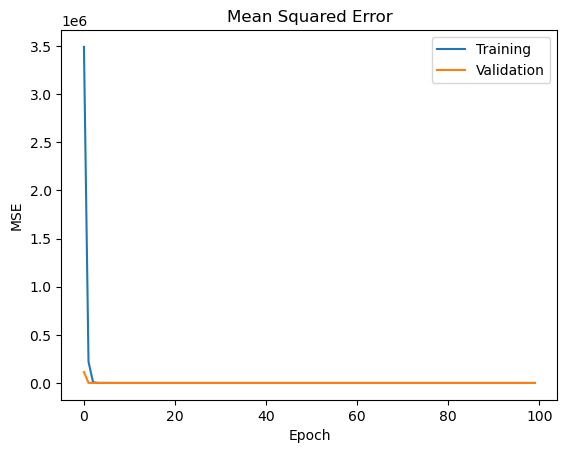

In [12]:
# Wybór kolumn do modelu
columns = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
           'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Podział danych na zbiór treningowy i testowy
train_data, test_data, train_labels, test_labels = train_test_split(
    data[columns], data['popularity'], test_size=0.2)

# Konwertowanie danych treningowych i testowych na tensory zmiennoprzecinkowe
train_data = tf.convert_to_tensor(train_data, dtype=tf.float32)
test_data = tf.convert_to_tensor(test_data, dtype=tf.float32)
train_labels = tf.convert_to_tensor(train_labels, dtype=tf.float32)
test_labels = tf.convert_to_tensor(test_labels, dtype=tf.float32)

# Tworzenie modelu
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(columns)]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Kompilacja modelu
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae', 'mse'])

# Trenowanie modelu
history = model.fit(train_data, train_labels, epochs=100, validation_split=0.2, verbose=0)

# Testowanie modelu i wyświetlenie wyników
test_results = model.evaluate(test_data, test_labels, verbose=0)
print(f'Testowe wartości: {test_results}')

# Wykres
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()